**<h1>Space-Based Cosmic Object Classification</h1>**

<h2>Utils</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Callable, Union

<h2>Data Loading</h2>

In [2]:
data = pd.read_csv("SDSS_DR18.csv")
print(data.shape)

(100000, 43)


In [3]:
data

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,3.580000e+18,154.077143,55.614066,19.39861,18.35476,18.00348,17.89408,17.81222,2243,...,18.35865,17.90406,17.82489,0.999653,0.999791,0.794516,0.802310,0.537987,-0.000101,STAR
99996,1.240000e+18,3.580000e+18,154.067926,55.635794,19.07703,18.05159,17.78332,17.68976,17.66209,2243,...,18.06198,17.69745,17.67005,0.802407,0.999912,0.999776,0.999682,0.544329,-0.000352,STAR
99997,1.240000e+18,1.070000e+18,153.897018,55.712582,19.07982,17.51349,16.64037,16.24183,15.91180,2243,...,19.05242,17.79391,17.40130,0.859021,0.760212,0.769053,0.772322,0.845797,0.117501,GALAXY
99998,1.240000e+18,6.950000e+17,235.656141,56.297044,17.27528,16.41704,16.11662,15.98858,15.97745,2206,...,16.42854,15.98151,15.97900,0.655041,0.199795,0.481020,0.650008,0.822835,-0.000400,STAR


<h2>Data Visualization</h2>

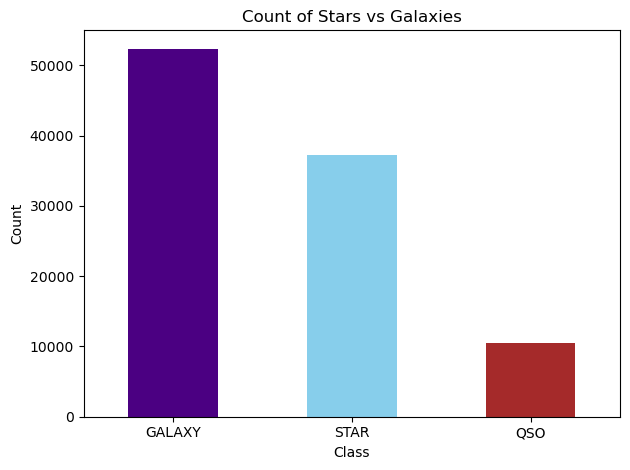

In [4]:
class_counts = data["class"].value_counts()

class_counts.plot(kind='bar', color=['indigo', 'skyblue', 'brown'])
plt.title('Count of Stars vs Galaxies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h2>Data Preprocessing</h2>

In [5]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
    drop_features: List[str] = None
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

<h2>Confusion Matrix Function</h2>

In [6]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None,
    figsize: Tuple = (10, 5)
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

            figsize: A tuple for setting the width and height of the plot.

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    fig, ax = plt.subplots(figsize=figsize)  
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True, fmt='g', ax=ax)
    plt.show()
    return cfm_df

<h2>Metrics</h2>

In [7]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

<h2>Data Preprocessing</h2>

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X,y)

**<h1>Logistic Regression</h1>**

In [10]:
from sklearn.linear_model import LogisticRegression

<h2>Logistic Regression Training</h2>

In [11]:
model = LogisticRegression().fit(X_trn,y_trn)

<h2>Logistic Regression Training Prediction</h2>

Training Accuracy: 0.989984375


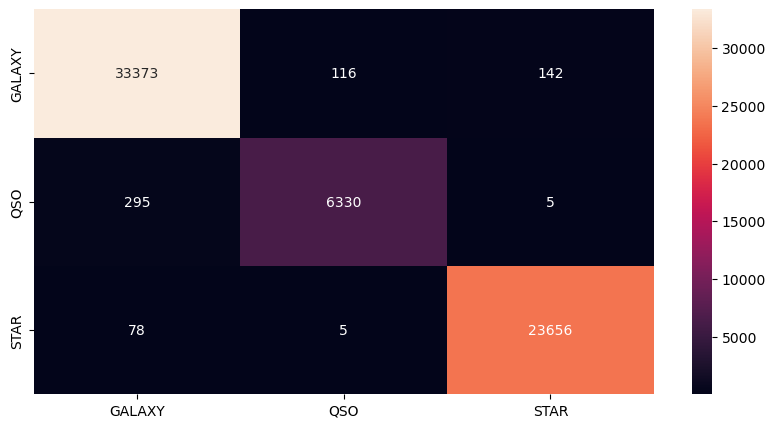

In [12]:
y_hat_train = model.predict(X_trn)

train_acc = accuracy_score(y_trn, y_hat_train)
print(f"Training Accuracy: {train_acc}")

cfm_df = plot_confusion_matrix(y_trn, y_hat_train)

<h2>Logistic Regression Validation Prediction</h2>

Validation Accuracy: 0.988875


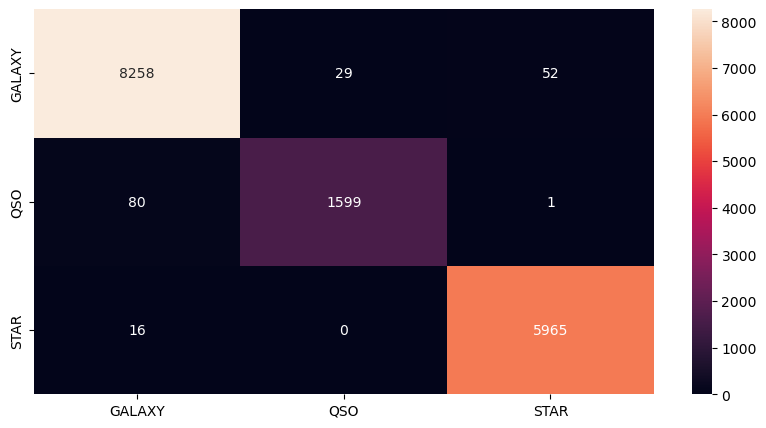

In [13]:
y_hat_valid = model.predict(X_vld)

valid_acc = accuracy_score(y_vld, y_hat_valid)
print(f"Validation Accuracy: {valid_acc}")

cfm_df = plot_confusion_matrix(y_vld, y_hat_valid)

<h2>Logistic Regression Testing Prediction</h2>

Testing Accuracy: 0.989


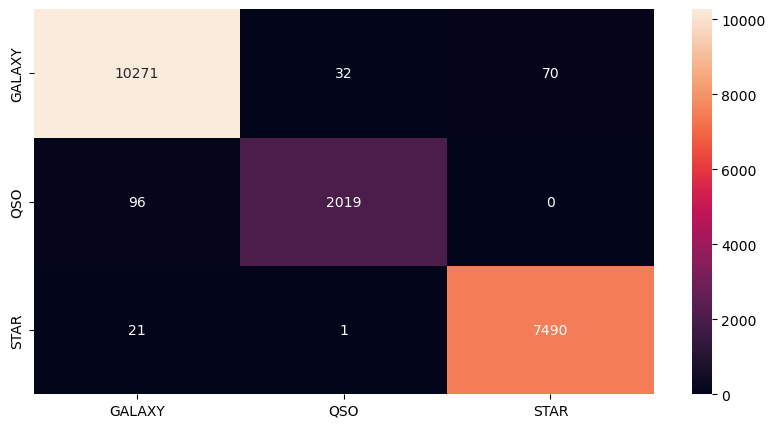

In [14]:
y_hat_test = model.predict(X_tst)

test_acc = accuracy_score(y_tst, y_hat_test)
print(f"Testing Accuracy: {test_acc}")

cfm_df = plot_confusion_matrix(y_tst, y_hat_test)

**<h1>K-Nearest Neighbors</h1>**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

<h2>K-Nearest Neighbors Training</h2>

In [16]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_trn, y_trn)

<h2>K-Nearest Neighbors Training Prediction</h2>

Training Accuracy: 0.980453125


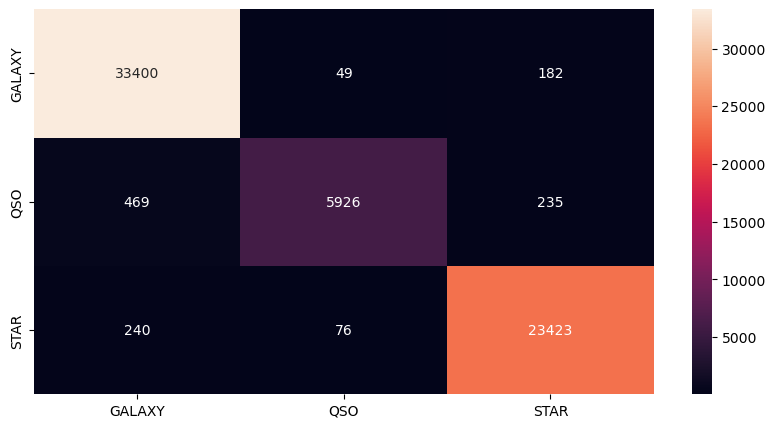

In [17]:
y_hat_train = knn.predict(X_trn)

train_acc = accuracy_score(y_trn, y_hat_train)
print(f"Training Accuracy: {train_acc}")

cfm = plot_confusion_matrix(y_trn, y_hat_train)

<h2>K-Nearest Neighbors Validation Prediction</h2>

Validation Accuracy: 0.9746875


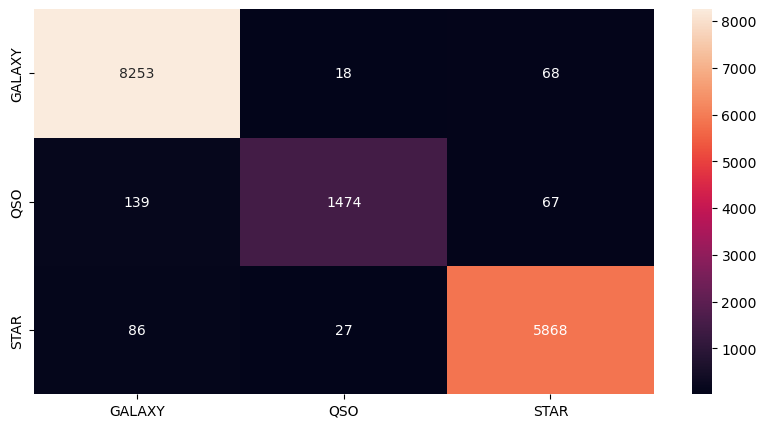

In [18]:
y_hat_valid = knn.predict(X_vld)

valid_acc = accuracy_score(y_vld, y_hat_valid)
print(f"Validation Accuracy: {valid_acc}")

cfm_df = plot_confusion_matrix(y_vld, y_hat_valid)

<h2>K-Nearest Neighbors Testing Prediction</h2>

Testing Accuracy: 0.97175


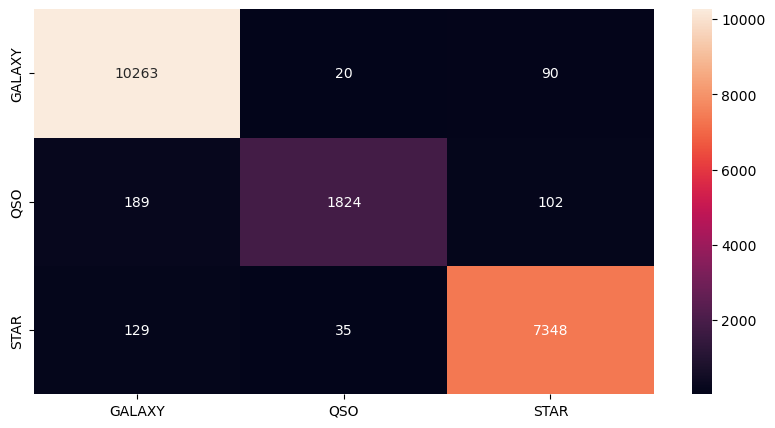

In [19]:
y_hat_test = knn.predict(X_tst)

test_acc = accuracy_score(y_tst, y_hat_test)
print(f"Testing Accuracy: {test_acc}")

cfm_df = plot_confusion_matrix(y_tst, y_hat_test)